In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import Libraries

In [2]:
import numpy as np
import pandas as pd


from scipy import stats 
from scipy.interpolate import make_interp_spline
import seaborn as sns
import matplotlib.pyplot as plt

#Norhan
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as ltb

#Mohammed
from sklearn import linear_model
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import PoissonRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Ahmed
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

#Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time
import joblib
import warnings
warnings.filterwarnings("ignore")

# **Load Data**

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/one_hot_encoded_dataset.csv')
dataset.head()

,type,flight_month,num_of_stops,formatted_price,distance_bet_2_countries,airline_Air India,airline_Indigo,airline_Other_airline,airline_Vistara,source_Bangalore,...,week_day_of_flight_Thursday,week_day_of_flight_Tuesday,dep_time_Afternoon,dep_time_Early morning,dep_time_Evening,dep_time_Morning,arr_time_Afternoon,arr_time_Early morning,arr_time_Evening,arr_time_Morning
0,1,2,1,54306,0.984105,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,2,1,17829,0.755223,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,2,1,14150,0.451862,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
3,0,2,1,13258,0.258401,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
4,0,2,0,6363,0.653497,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


# **Spliting the Dataset**

In [4]:
y_train = dataset['formatted_price'][:192167]
y_test = dataset['formatted_price'][192167:]

dataset.drop(columns=['formatted_price'],axis=1,inplace=True)

x_train = dataset[:192167]
x_test = dataset[192167:]

# **Visualization**

In [5]:
def compare_orgin_predict(y_test,y_pred,N=40):
  x_ax = range(len(y_test[:N]))
  plt.plot(x_ax, y_test[:N], label="original")
  plt.plot(x_ax, y_pred[:N], label="predicted")
  plt.title("Flight Price test and predicted data")
  plt.xlabel('Observation Number')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

# **Modeling**

In [6]:
models = {
    #Norhan
    "XGBR": XGBRegressor(),
    "PR"  : linear_model.PoissonRegressor(),
    "HGBR": HistGradientBoostingRegressor(),
    "LGBMR": ltb.LGBMRegressor(),
    #Mohammed
    "LR": linear_model.LinearRegression(),
    "GBR": ensemble.GradientBoostingRegressor(),
    "ETR": ensemble.ExtraTreesRegressor(),
    # "KNNR": KNeighborsRegressor(),
    #Ahmed
    "BR": BaggingRegressor(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()   
}

Using model: XGBR
[19:19:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time: 15.016988314
Training Score: 0.9436360498325455
Test Score: 0.9594765338269255
r2_score: 0.9594765338269255
MSE: 20859920.533172548
RMSE: 4567.266199070572
MAE: 2688.5061415231303
----------------------------------------


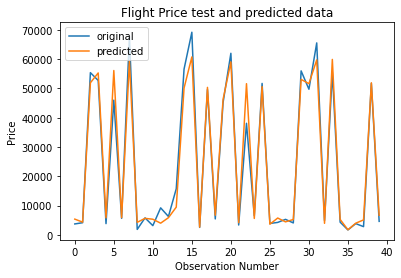

----------------------------------------
Using model: PR
Time: 6.294959046999999
Training Score: 0.9296330430965987
Test Score: 0.9477189558224629
r2_score: 0.9401086491691732
MSE: 30829762.035151694
RMSE: 5552.455496008202
MAE: 3673.412577457249
----------------------------------------


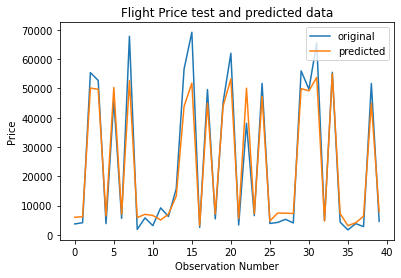

----------------------------------------
Using model: HGBR
Time: 5.99643206
Training Score: 0.9545641127007674
Test Score: 0.9682062053933458
r2_score: 0.9682062053933458
MSE: 16366221.638352538
RMSE: 4045.518710666475
MAE: 2284.1051915111843
----------------------------------------


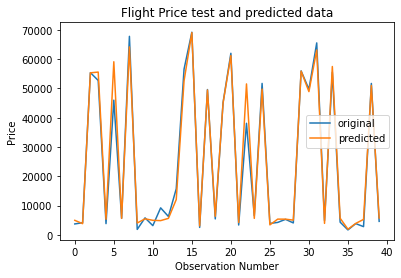

----------------------------------------
Using model: LGBMR
Time: 1.6222694590000017
Training Score: 0.9543684088381323
Test Score: 0.9681562751056523
r2_score: 0.9681562751056523
MSE: 16391923.828511592
RMSE: 4048.694089272687
MAE: 2282.1987405977625
----------------------------------------


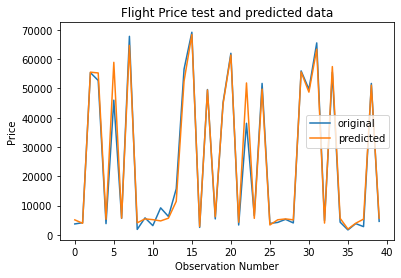

----------------------------------------
Using model: LR
Time: 0.241071833999996
Training Score: 0.9038756373677859
Test Score: 0.9211493110634286
r2_score: 0.9211493110634286
MSE: 40589299.49816781
RMSE: 6370.973198669714
MAE: 4243.8369144284825
----------------------------------------


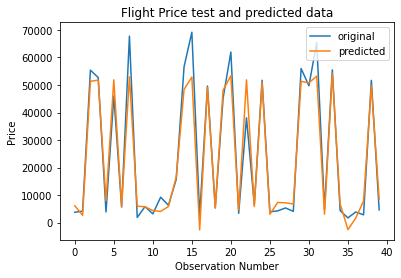

----------------------------------------
Using model: GBR
Time: 21.368649295000004
Training Score: 0.943728971093468
Test Score: 0.9595342638924769
r2_score: 0.9595342638924769
MSE: 20830203.31760585
RMSE: 4564.01175695307
MAE: 2681.465991758603
----------------------------------------


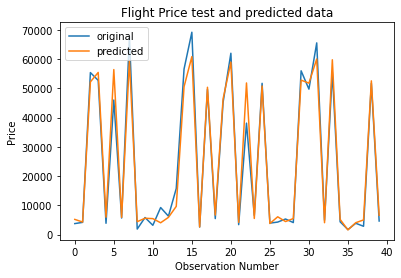

----------------------------------------
Using model: ETR
Time: 63.998849255
Training Score: 0.9619845843983686
Test Score: 0.9689547349794922
r2_score: 0.9689547349794922
MSE: 15980907.420238603
RMSE: 3997.612715138699
MAE: 2042.3389855531263
----------------------------------------


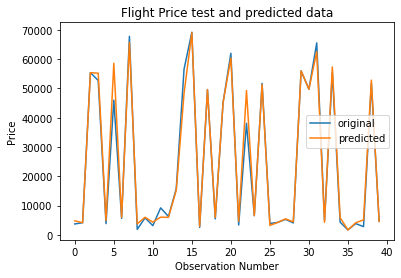

----------------------------------------
Using model: BR
Time: 4.929776231999995
Training Score: 0.9614677385928809
Test Score: 0.9688489613992967
r2_score: 0.9688489613992967
MSE: 16035355.587825427
RMSE: 4004.4170097313076
MAE: 2047.6999023129506
----------------------------------------


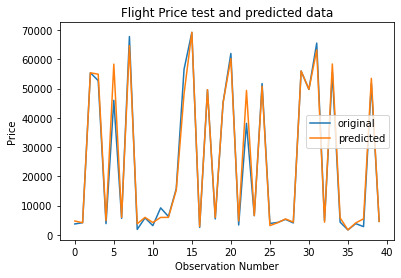

----------------------------------------
Using model: DT
Time: 0.731813944999999
Training Score: 0.9619845843983685
Test Score: 0.9689480370886534
r2_score: 0.9689480370886534
MSE: 15984355.236623352
RMSE: 3998.043926299879
MAE: 2043.3360525508474
----------------------------------------


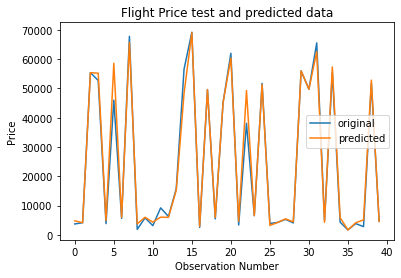

----------------------------------------
Using model: RF
Time: 48.10352144000001
Training Score: 0.9618480651384205
Test Score: 0.9691338638976004
r2_score: 0.9691338638976004
MSE: 15888698.74833061
RMSE: 3986.063063767382
MAE: 2041.259419663736
----------------------------------------


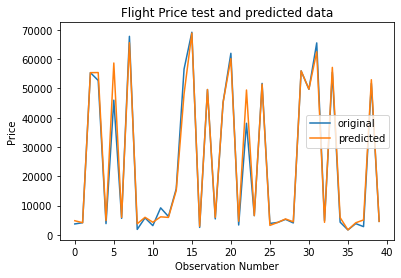

----------------------------------------


In [7]:
for name, model in models.items():
    
    start = time.process_time()
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Time: {time.process_time() - start}')
    
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    
    y_pred = model.predict(x_test)
    joblib.dump(model, f'{name}.h5')
    print(f'r2_score: {r2_score(y_test,y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

    print('-'*40)
    compare_orgin_predict(y_test,y_pred)
    print('-'*40)




# **Simple Ensemble Techniques (Averaging)**

In [11]:
# We will use The best Models With high accuracy
Ensamble_models = {
    "HGBR": HistGradientBoostingRegressor(),
    "LGBMR": ltb.LGBMRegressor(),
    "ETR": ensemble.ExtraTreesRegressor(),
    "BR": BaggingRegressor(),
    "RF": RandomForestRegressor()  
}

In [13]:
Ensemble_accuracy = 0
Ensemble_training_score = 0 
Ensemble_testing_score = 0
Ensemble_MSE = 0


for name, model in Ensamble_models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    Ensemble_accuracy += r2_score(y_test,y_pred)
    Ensemble_training_score += model.score(x_train, y_train) 
    Ensemble_testing_score += model.score(x_test, y_test)
    Ensemble_MSE += mean_squared_error(y_test, y_pred)

Ensemble_accuracy /= 5
Ensemble_training_score /= 5 
Ensemble_testing_score /= 5
Ensemble_MSE /= 5


print(f'Ensemble_accuracy: {Ensemble_accuracy}')
print(f'Ensemble_training_score: {Ensemble_training_score}')
print(f'Ensemble_testing_score: {Ensemble_testing_score}')
print(f'Ensemble_MSE: {Ensemble_MSE}')

Ensemble_accuracy: 0.96866556205607
Ensemble_training_score: 0.9588287873394481
Ensemble_testing_score: 0.96866556205607
Ensemble_MSE: 16129762.510204822
